In [4]:
#Importamos Librerias
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#Cargamos archivo
df_Athenes= pd.read_csv('Athenes.csv') 

In [6]:
#Seleccionamos solo las columnas que utilizaremos para este análisis y crearemos un nuevo dataframe
df_Athenes2 = df_Athenes.loc[:, ['room_type','price', 'minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]
df_Athenes2

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Entire home/apt,103.0,1,33,0.24,7,178,7
1,Entire home/apt,71.0,1,62,0.52,7,278,14
2,Entire home/apt,55.0,1,87,0.73,7,147,24
3,Entire home/apt,65.0,2,29,0.35,2,94,13
4,Entire home/apt,75.0,1,29,0.20,7,248,5
...,...,...,...,...,...,...,...,...
11316,Entire home/apt,40.0,3,0,NaN,1,57,0
11317,Entire home/apt,49.0,2,32,2.51,3,121,30
11318,Entire home/apt,25.0,15,16,0.33,4,25,4
11319,Entire home/apt,28.0,2,3,0.80,1,0,3


In [7]:
#Detectamos valores nulos
valores_nulos = df_Athenes2.isnull().sum()
valores_nulos

room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2033
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [8]:
#Copia del dataframe
df_Athenes3=df_Athenes2.copy()
#Realizar valores nulos con promedio 
df_Athenes3["reviews_per_month"]=df_Athenes3["reviews_per_month"].fillna(round(df_Athenes2["reviews_per_month"].mean(),1))
df_Athenes3

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Entire home/apt,103.0,1,33,0.24,7,178,7
1,Entire home/apt,71.0,1,62,0.52,7,278,14
2,Entire home/apt,55.0,1,87,0.73,7,147,24
3,Entire home/apt,65.0,2,29,0.35,2,94,13
4,Entire home/apt,75.0,1,29,0.20,7,248,5
...,...,...,...,...,...,...,...,...
11316,Entire home/apt,40.0,3,0,1.60,1,57,0
11317,Entire home/apt,49.0,2,32,2.51,3,121,30
11318,Entire home/apt,25.0,15,16,0.33,4,25,4
11319,Entire home/apt,28.0,2,3,0.80,1,0,3


In [9]:
#Corroboramos que no existan nulos
valores_nulos = df_Athenes3.isnull().sum().sum()
valores_nulos

0

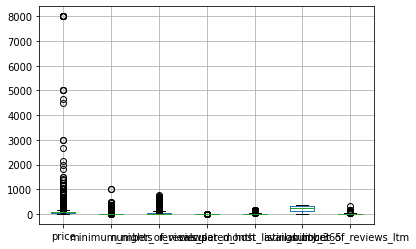

In [10]:
#Graficamos todas las dispersiones entre todas las variables
boxplot = df_Athenes3.boxplot(column=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm'])  

In [11]:
y=df_Athenes3
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido price                             821.655577
minimum_nights                     67.238766
number_of_reviews                 259.921896
reviews_per_month                   5.892822
calculated_host_listings_count     90.506371
availability_365                  569.739302
number_of_reviews_ltm              69.264196
dtype: float64
Limite inferior permitido price                            -635.179294
minimum_nights                    -60.077208
number_of_reviews                -174.675009
reviews_per_month                  -2.770561
calculated_host_listings_count    -66.548240
availability_365                 -124.967109
number_of_reviews_ltm             -44.512849
dtype: float64


/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6957/777126508.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Superior= y.mean() + 3*y.std()
/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6957/777126508.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Inferior= y.mean() - 3*y.std()


In [12]:
#Encontramos Ouliers del Dataframe
outliers= df_Athenes3[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6957/754875012.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= df_Athenes3[(y>Limite_Superior)|(y<Limite_Inferior)]


,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
Athenes_clean=df_Athenes3.copy()
Athenes_clean=Athenes_clean.fillna(round(df_Athenes3.mean(),1))
Athenes_clean

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6957/337677429.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Athenes_clean=Athenes_clean.fillna(round(df_Athenes3.mean(),1))


,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Entire home/apt,103.0,1,33,0.24,7,178,7
1,Entire home/apt,71.0,1,62,0.52,7,278,14
2,Entire home/apt,55.0,1,87,0.73,7,147,24
3,Entire home/apt,65.0,2,29,0.35,2,94,13
4,Entire home/apt,75.0,1,29,0.20,7,248,5
...,...,...,...,...,...,...,...,...
11316,Entire home/apt,40.0,3,0,1.60,1,57,0
11317,Entire home/apt,49.0,2,32,2.51,3,121,30
11318,Entire home/apt,25.0,15,16,0.33,4,25,4
11319,Entire home/apt,28.0,2,3,0.80,1,0,3


In [14]:
#Obtenemos el archivo limpio
Athenes_clean.to_csv("Athenes_clean.csv")

In [16]:
#Encontramos todas las correlaciones entre las variables y aplicamos valor absoluto
CorreTotal=Athenes_clean.corr()
CorreTotal2= abs(CorreTotal)
CorreTotal2

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.040986,0.033784,0.015212,0.000004,0.019025,0.031105
minimum_nights,0.040986,1.000000,0.024536,0.045547,0.029108,0.010810,0.053267
number_of_reviews,0.033784,0.024536,1.000000,0.628489,0.010405,0.043629,0.692319
reviews_per_month,0.015212,0.045547,0.628489,1.000000,0.052206,0.043356,0.735037
calculated_host_listings_count,0.000004,0.029108,0.010405,0.052206,1.000000,0.000005,0.068417
availability_365,0.019025,0.010810,0.043629,0.043356,0.000005,1.000000,0.022459
number_of_reviews_ltm,0.031105,0.053267,0.692319,0.735037,0.068417,0.022459,1.000000


<AxesSubplot:>

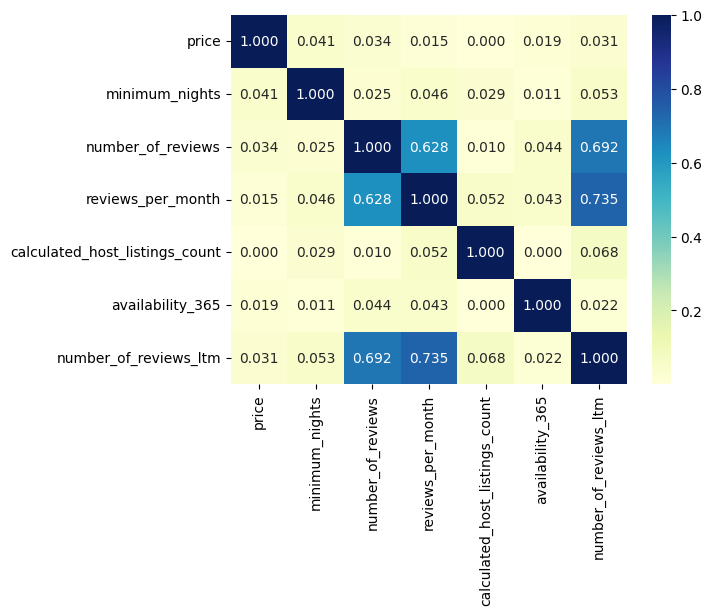

In [17]:
Heat_Map= sns.heatmap(CorreTotal2, cmap = 'YlGnBu', annot=True, fmt=".3f")  
Heat_Map